In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV


### Preparo los datos

In [2]:
train = pd.read_pickle("../../armado_datos/train_completo")

In [3]:
train.set_index("device_id",inplace = True)

#### Elimino datos de clicks, muchos nulos

In [4]:
train = train.drop(columns = ['tiempo_hasta_click_mean',
       'tiempo_hasta_click_max', 'tiempo_hasta_click_min',
       'tiempo_hasta_click_std', 'cantidad_clicks', 'apariciones_en_dia_1_y',
       'apariciones_en_dia_2_y', 'apariciones_en_dia_3_y',
       'tiempo_medio_entre_clicks'])

In [5]:
train.dropna(inplace = True)

#### Elimino columnas que pueden impactar mucho en el tiempo de procesamiento de KNN

In [6]:
columnas_eliminar =  ['apariciones_en_hora_0',
       'apariciones_en_hora_1', 'apariciones_en_hora_2',
       'apariciones_en_hora_3', 'apariciones_en_hora_4',
       'apariciones_en_hora_5', 'apariciones_en_hora_6',
       'apariciones_en_hora_7', 'apariciones_en_hora_8',
       'apariciones_en_hora_9', 'apariciones_en_hora_10',
       'apariciones_en_hora_11', 'apariciones_en_hora_12',
       'apariciones_en_hora_13', 'apariciones_en_hora_14',
       'apariciones_en_hora_15', 'apariciones_en_hora_16',
       'apariciones_en_hora_17', 'apariciones_en_hora_18',
       'apariciones_en_hora_19', 'apariciones_en_hora_20',
       'apariciones_en_hora_21', 'apariciones_en_hora_22',
       'apariciones_en_hora_23',]

In [7]:
train.drop(columns = columnas_eliminar,inplace = True)

In [8]:
len(train)

401576

In [12]:
train.columns

Index(['target', 'cantidad_apariciones', 'apariciones_en_dia_1_x',
       'apariciones_en_dia_2_x', 'apariciones_en_dia_3_x',
       'cantidad_so_registrados', 'so_media', 'tiempo_medio_entre_apariciones',
       'tiempo_maximo_entre_apariciones', 'desvio_entre_apariciones',
       'apariciones_en_source_0', 'apariciones_en_source_1',
       'apariciones_en_source_2', 'apariciones_en_source_3',
       'apariciones_en_source_4', 'apariciones_en_source_5',
       'apariciones_en_source_6', 'apariciones_en_source_7',
       'apariciones_en_source_8', 'apariciones_en_source_9',
       'tiempo_ultima_aparicion_hasta_fin_ventana',
       'tiempo_hora_frec_aparicion_subasta',
       'tiempo_segunda_hora_frec_aparicion', 'cant_eventos', 'prom_eventos',
       'eventos_dia_1', 'eventos_dia_2', 'eventos_dia_3', 'max_cant_eventos',
       'cant_eventos_maximos', 'segs_hasta_hora_freq', 'eventos_franja_1',
       'eventos_franja_2', 'eventos_franja_3', 'eventos_franja_4',
       'eventos_franja_5'

---

### K = 7

In [18]:
train , test = train_test_split(train, test_size = 0.3)
x_train = train.drop('target', axis=1)
y_train = train['target']

x_test = test.drop('target', axis = 1)
y_test = test['target']

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

/home/pelozo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/pelozo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
K = 7

In [18]:
model = neighbors.KNeighborsRegressor(n_neighbors = K)


In [19]:
model.fit(x_train, y_train)  
pred=model.predict(x_test) 

error = sqrt(mean_squared_error(y_test,pred))

print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  7 is: 96482.92578259856


---

### K = 8

In [20]:
K = 8

In [21]:
model = neighbors.KNeighborsRegressor(n_neighbors = K)


In [22]:
model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse

print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  8 is: 95754.46816067926


### K = 10

In [23]:
K = 10

In [24]:
model = neighbors.KNeighborsRegressor(n_neighbors = K)


In [25]:
model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse

print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  10 is: 94651.43685871152


### K = 10 cambiando el parametro de los peso por distancia

In [26]:
model = neighbors.KNeighborsRegressor(n_neighbors = K, weights = 'distance')

In [27]:
model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse

print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  10 is: 94900.50376973594


##### Empeora 

---

### K = 6

In [10]:
K = 6

In [13]:
train_b , test = train_test_split(train, test_size = 0.2)
x_train = train_b.drop('target', axis=1)
y_train = train_b['target']

x_test = test.drop('target', axis = 1)
y_test = test['target']

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

/home/pelozo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/pelozo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
model = neighbors.KNeighborsRegressor(n_neighbors = K)


In [16]:
model.fit(x_train, y_train)  
pred=model.predict(x_test) 
error = sqrt(mean_squared_error(y_test,pred)) 

print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  6 is: 97245.44066181454


### Buscando el mejor K con GridSearch

In [8]:
y = train['target']
X = train.drop(axis=1, labels=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

/home/pelozo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/pelozo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Imposible que termine de correr, tarda mucho

In [ ]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_



#### Otra opción

In [17]:
rmse_val = [] # guardar los diferentes resultados para las k
for K in range(4,11):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred))
    
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  4 is: 100547.5918890875
RMSE value for k=  5 is: 98590.21697727592
RMSE value for k=  6 is: 97267.91560622105
RMSE value for k=  7 is: 96223.73800236205
RMSE value for k=  8 is: 95461.62613295658
RMSE value for k=  9 is: 94937.22870007245
RMSE value for k=  10 is: 94476.76880221858


In [18]:
rmse_val = [] # guardar los diferentes resultados para las k
for K in range(9,13):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred))
    
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  9 is: 94937.22870007245
RMSE value for k=  10 is: 94476.76880221858
RMSE value for k=  11 is: 94108.07860622204
RMSE value for k=  12 is: 93773.2026876875


### Aumentando K  mejora el resultado ¿Sobreajuste ? 

In [19]:
rmse_val = [] # guardar los diferentes resultados para las k
for K in range(11,17):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred))
    
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  11 is: 94108.07860622204
RMSE value for k=  12 is: 93773.2026876875
RMSE value for k=  13 is: 93488.65247645114
RMSE value for k=  14 is: 93288.00021723514
RMSE value for k=  15 is: 93067.00441750916
RMSE value for k=  16 is: 92903.23782711933


#### Curva de valores para cada K

In [10]:
rmse_val = [np.inf,np.inf,np.inf,np.inf,100547.5918890875,98590.21697727592,97267.91560622105,
            96223.73800236205,95461.62613295658,94937.22870007245,
            94108.07860622204,93773.2026876875,93488.65247645114,
            93288.00021723514,93067.00441750916,92903.23782711933]

In [12]:
for K in range(17,27):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred))
    
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  17 is: 92945.74768264379
RMSE value for k=  18 is: 92807.70015925345
RMSE value for k=  19 is: 92719.09745090448
RMSE value for k=  20 is: 92645.04707412321
RMSE value for k=  21 is: 92513.26405115283
RMSE value for k=  22 is: 92406.45863869032
RMSE value for k=  23 is: 92324.17599697754
RMSE value for k=  24 is: 92242.7337127097
RMSE value for k=  25 is: 92166.38870331972
RMSE value for k=  26 is: 92108.5662245751


In [13]:
K = 26

In [21]:
model = neighbors.KNeighborsRegressor(n_neighbors = K,weights = 'distance')


In [23]:
model.fit(X_train, y_train)  
pred=model.predict(X_test) 
error = sqrt(mean_squared_error(y_test,pred))
    
rmse_val.append(error) 
print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  26 is: 92193.35805306565


##### Empeora con el parametro distancia

---

In [26]:
for K in range(27,37):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred))
    
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  27 is: 92060.89735448197
RMSE value for k=  28 is: 92021.23563763438
RMSE value for k=  29 is: 91965.77983208877
RMSE value for k=  30 is: 91931.58786603934
RMSE value for k=  31 is: 91907.27313562621
RMSE value for k=  32 is: 91877.57756235402
RMSE value for k=  33 is: 91822.88856978627
RMSE value for k=  34 is: 91793.05851603246
RMSE value for k=  35 is: 91769.01537866761
RMSE value for k=  36 is: 91709.60739092011


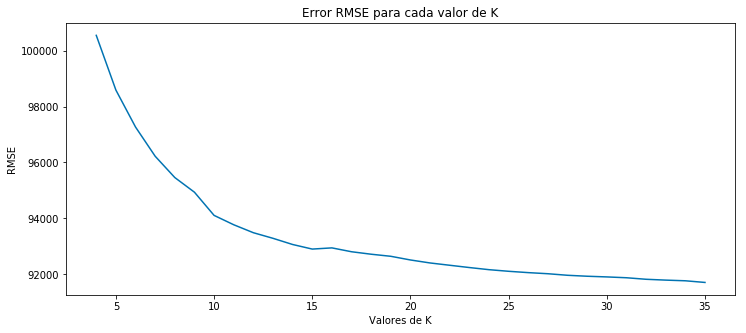

In [37]:
curva = pd.DataFrame(rmse_val)

plt.figure(figsize=(12, 5))
plt.xlabel("Valores de K")
plt.ylabel("RMSE")
plt.title("Error RMSE para cada valor de K")
plt.plot(curva)


### Pruebas con solo auctions

In [3]:
train = pd.read_pickle("../../armado_datos/train_completo")

In [4]:
train.set_index("device_id",inplace = True)

In [5]:
#Me quedo con las columnas de auctions
train = train.iloc[:,:47]

In [6]:
len(train)

1611351

### Tomo una muestra random de 400 mil filas para comparar 

In [7]:
nro_filas = 400000

In [8]:
train = train.sample(nro_filas, random_state = 1)

In [10]:
train , test = train_test_split(train, test_size = 0.3)
x_train = train.drop('target', axis=1)
y_train = train['target']

x_test = test.drop('target', axis = 1)
y_test = test['target']

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

---

In [12]:
K = 7

In [13]:
model = neighbors.KNeighborsRegressor(n_neighbors = K)


In [14]:
model.fit(x_train, y_train)  
pred=model.predict(x_test) 

error = sqrt(mean_squared_error(y_test,pred))

print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  7 is: 95805.08699430623


---

In [18]:
K = 15

In [19]:
model = neighbors.KNeighborsRegressor(n_neighbors = K)


In [20]:
model.fit(x_train, y_train)  
pred=model.predict(x_test) 

error = sqrt(mean_squared_error(y_test,pred))

print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  15 is: 92701.8702564042


----

In [21]:
K = 25

In [22]:
model = neighbors.KNeighborsRegressor(n_neighbors = K)


In [23]:
model.fit(x_train, y_train)  
pred=model.predict(x_test) 

error = sqrt(mean_squared_error(y_test,pred))

print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  25 is: 91649.60092271672


---

In [24]:
rmse_val = []

In [26]:
for K in range(27,41):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  
    pred=model.predict(x_test) 
    error = sqrt(mean_squared_error(y_test,pred))
    
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  27 is: 91549.04496248382
RMSE value for k=  28 is: 91510.68626541238
RMSE value for k=  29 is: 91486.06471774526
RMSE value for k=  30 is: 91422.24677956641
RMSE value for k=  31 is: 91380.6875875546
RMSE value for k=  32 is: 91347.39499988437
RMSE value for k=  33 is: 91325.13836737789
RMSE value for k=  34 is: 91277.25092482012
RMSE value for k=  35 is: 91261.57009943784
RMSE value for k=  36 is: 91257.32071344252
RMSE value for k=  37 is: 91235.3699735946
RMSE value for k=  38 is: 91223.64525293387
RMSE value for k=  39 is: 91193.31018448621
RMSE value for k=  40 is: 91172.39022777235


## Nuevas pruebas, datos entrenamientos con pocos features

In [2]:
train = pd.read_pickle("../../armado_datos/train_nuevo_completo")

In [3]:
train.isnull().sum(axis = 1).max()

11

In [4]:
train.shape


(1286041, 58)

In [5]:
train.fillna(0,inplace = True)

In [6]:
train , test = train_test_split(train, test_size = 0.2)
x_train = train.drop('target', axis=1)
y_train = train['target']

x_test = test.drop('target', axis = 1)
y_test = test['target']

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

---

In [8]:
K = 25

In [9]:
model = neighbors.KNeighborsRegressor(n_neighbors = K)


In [10]:
model.fit(x_train, y_train)  
pred=model.predict(x_test) 

error = sqrt(mean_squared_error(y_test,pred))

print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  25 is: 91314.94077552456
